<a href="https://colab.research.google.com/github/Direspecific/CCDATRCL_ASSIGNMENT_COM221/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [477]:
df = pd.read_excel("personality.xlsx")

1. Display the summary of all the features of the dataset using `.info()`

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         49 non-null     object
 1   Post/Share Frequently?       49 non-null     int64 
 2   Active in social media?      49 non-null     int64 
 3   Replies to comments?         49 non-null     int64 
 4   Number of friends/followers  49 non-null     int64 
 5   Personality                  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [479]:
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
Adriannee,0,1,0,1000,0,1
Jasper,0,1,1,1000,0,1
Jill,1,1,0,3000,0,1
Jochelle,1,1,0,2100,1,1
Joseph,1,1,1,4900,1,1
Josh,1,1,1,2000,1,1
Joshua,0,1,0,1200,0,1
Justice,1,1,0,2100,1,1
Kevin,0,0,0,4800,1,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [480]:
X = df.drop(columns=['Name','Personality']).values
X

array([[   1,    1,    1, 4900],
       [   0,    1,    1, 2000],
       [   1,    1,    0, 1800],
       [   0,    1,    0, 1200],
       [   1,    1,    1, 1000],
       [   1,    1,    1, 2800],
       [   0,    1,    0,  451],
       [   1,    1,    0,   19],
       [   1,    1,    1, 2500],
       [   0,    1,    0, 1100],
       [   1,    1,    1, 3000],
       [   0,    1,    1, 1000],
       [   1,    1,    1, 2500],
       [   0,    1,    0, 1000],
       [   1,    1,    1, 4000],
       [   1,    1,    0, 1000],
       [   1,    1,    0, 1000],
       [   1,    1,    0, 2300],
       [   0,    1,    0,  800],
       [   1,    1,    0, 2000],
       [   1,    1,    1,  700],
       [   0,    0,    1,  100],
       [   0,    1,    0, 2200],
       [   1,    1,    0, 1400],
       [   1,    1,    1, 2000],
       [   0,    1,    0,  103],
       [   1,    1,    0, 3000],
       [   1,    1,    0, 3200],
       [   1,    1,    0, 2000],
       [   0,    0,    0, 4800],
       [  

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [481]:
y = df['Personality'].values
y

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1])

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [482]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    random_state=8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44, 4)
(44,)
(5, 4)
(5,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [483]:
knn = KNeighborsClassifier(n_neighbors=5)

7. Train the model using the `.fit()`

In [484]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

8. Test the model using the `.predict()`

In [485]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

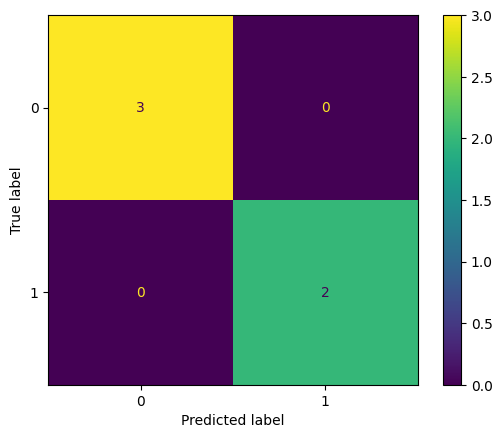

In [486]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [487]:
metrics.accuracy_score(y_test, y_pred)

1.0

11. Display the precision

In [488]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1. 1.]


12. Display the recall

In [489]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1. 1.]


13. Display the f1-score

In [490]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [1. 1.]


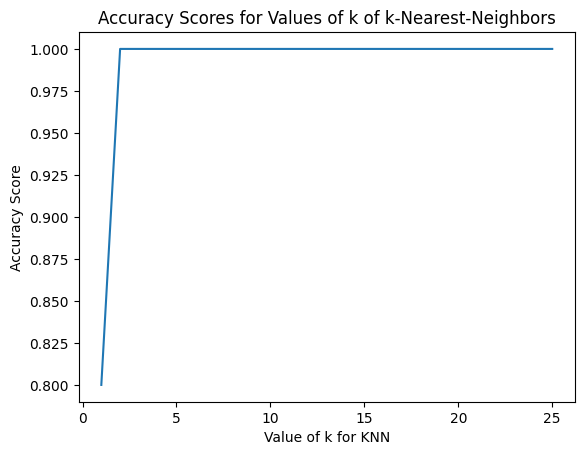

In [492]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [494]:
knn.predict([[0,1,0,1000]])

array([0])